**Over the past years, the pre-owned car market has grown larger than the new car market.**
**Cars4U is a budding tech start-up that aims to find footholes in this market.**

Used cars have a lot of uncertainty in both pricing and supply. With this realization, we aim to develop a pricing model to enable Cars4U compete by being able to utilize profitable differential strategies, supported by sound modelling and prediction methods.  

**Objective**

* Explore and visualize our data
* Build a linear regression model to predict the prices of used cars
* Generate a set of insights and recommendations for Cars4U

**Data Dictionary**

* S.No. : Serial Number
* Name : Brand name and Model name of the car
* Location : The location in which the car is being sold
* Year : Manufacturing year of the car
* Kilometers_driven : The total kilometers driven by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner : Type of ownership (Ranges from 1st to 4th Owner)
* Mileage : The standard mileage offered by the car in kmpl or km/kg
* Engine : The displacement of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
* Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## IMPORT LIBRARIES

In [1009]:
# import the required libraries
# for our calculations and transformations
import pandas as pd
import numpy as np

#for our plotting and visualization 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [1010]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORT + EXPLORE THE DATA

In [1011]:
# import the data and view its shape using f-string

csv = pd.read_csv('C:/Users/ffpch/Desktop/PGP-DSBA/Supervised Learning/Cars4U/used_cars_data.csv')
data = csv.copy()
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset")

There are 7253 rows and 14 columns in the dataset


Let's explore what the data looks like 

In [1012]:
# set the random seed so we get the same 
# rows each time, then view a random 
# set of 5 rows in the data 

np.random.seed(1)
data.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.000,9.47 Lakh,6.000
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.000,5.44 Lakh,4.110
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.000,NaN,6.000
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.000,NaN,35.280
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.000,NaN,6.340


Rows look good on first glance 

In [1013]:
# inspect our data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**Observations** - We have 9 Object types, 3 integers, and 2 floats. These may be adjusted as move along. There are also quite a few missng values which we'll investigate in detail shortly.

In [1014]:
# view stat summary

data.describe(include = 'all').fillna('-').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.000,-,-,-,3626.000,2093.905,0.000,1813.000,3626.000,5439.000,7252.000
Name,7253,2041,Mahindra XUV500 W8 2WD,55,-,-,-,-,-,-,-
Location,7253,11,Mumbai,949,-,-,-,-,-,-,-
Year,7253.000,-,-,-,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,-,-,-,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Fuel_Type,7253,5,Diesel,3852,-,-,-,-,-,-,-
Transmission,7253,2,Manual,5204,-,-,-,-,-,-,-
Owner_Type,7253,4,First,5952,-,-,-,-,-,-,-
Mileage,7251,450,17.0 kmpl,207,-,-,-,-,-,-,-
Engine,7207,150,1197 CC,732,-,-,-,-,-,-,-


* **S.No** is not statisitcally significant, as it is a serial number and doesn't need aggregation. Ignore the stats here
* Price has a large range, and we may consider investigating this later to ensure our modelling is not jeorpadized.
* Mileage, Power, and Engine are showing as categories. This will also be modified later on.
* We see that seats has a min value of 0 which is likely not the case on any of these cars - We'll fix this later

#### Check for Duplicates

In [1015]:
data.duplicated().sum()

0

We do not have any duplicates

### Check Missing Values

We want to check the % of missing values in each column

In [1016]:
# We will print an output showing each column alongside 
# its number of missing values. The % of missing values
# is also shown

print('\033[4m' + '% of Missing Values Per Column' + '\033[0m' ) # print our title
for columns in data.dtypes.index: # look at only category columns
    
    counts = len(data[columns])
    missing = data[columns].isnull().sum() # number of missing values in the column
    ratio = round((missing/counts) * 100,2) # expressed as %
    
    print(f'\033[1m'+'\033[36m'+str(columns)+'\033[0m'+' - '+ '\033[1m' + '\033[91m' + 
          str(missing) + '|' +str(ratio) +'%'+'\033[0m') # print the output

% of Missing Values Per Column
S.No. - 0|0.0%
Name - 0|0.0%
Location - 0|0.0%
Year - 0|0.0%
Kilometers_Driven - 0|0.0%
Fuel_Type - 0|0.0%
Transmission - 0|0.0%
Owner_Type - 0|0.0%
Mileage - 2|0.03%
Engine - 46|0.63%
Power - 46|0.63%
Seats - 53|0.73%
New_Price - 6247|86.13%
Price - 1234|17.01%


* Most columns have no missing values
* Mileage, Engine, Power, and Seats all have less than 1% of it's data missing
* New_Price has most of it's values missing ( > 86% ) - We will drop it as it will likely skew results regardless of how it's treated
* Price, the Dependent variable has 17% of it's data missing 

    We'll deal with these values down the line before commencing EDA so we have good data to plot our charts with

#### Drop New_Price and S.No. Columns

To be effective with our memory, we'll drop columns right away
* New Price will be dropped because the amount of missing values
* Serial number adds no value and will also be dropped

In [1017]:
# drop the New_Price column as it has too many null values and will skew the model regardless of how we treat it
# drop serial number as it adds no value to our model

data.drop('New_Price', axis = 1, inplace = True)
data.drop('S.No.', axis = 1, inplace = True)
data.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,1.750
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,12.500
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,4.500


Outcome - **New_Price** and **S.No.** columns are gone now

#### Extract the 'Brand' from 'Name'

The **Name** column contains the car *Brand* and *Model*. However, enconding hundreds or possibly thousands of models is not practical here. We'll keep only the Brand

In [1018]:
# split the Name column into a list with 2 elements 
data['Brand'] = data.Name.str.split(" ", 1, expand=True)[0] # get the first item in the list ie the brand name 
data.drop('Name', axis = 1, inplace = True) # drop the name column as it no longer has any value 

In [1019]:
# View data
data.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,1.750,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,12.500,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,4.500,Honda


Let's inspect our Brands

In [1020]:
data['Brand'].describe()

count       7253
unique        33
top       Maruti
freq        1444
Name: Brand, dtype: object

Outcome - There are 33 Brands and Maruti is the top Brand, with 1444 used cars on the market

In [1021]:
# view our brands
data['Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
ISUZU               3
Force               3
Bentley             2
Isuzu               2
Smart               1
Ambassador          1
Lamborghini         1
OpelCorsa           1
Hindustan           1
Name: Brand, dtype: int64

We notice a duplicate Brand "Isuzu" and "ISUZU". We will fix this later.

I also think that becasue there are not enough vehicles for brands like Ambassador and Bentley, These brands wil be dropped later

## EXPLORATORY DATA ANALYSIS AND PROCESSING OF COLUMNS 

* To ensure all issues in the data are handled appropriately, moving forward we'll move back and forth between EDA and Data Processing
* EDA helps understand what requires processing, and how to process it

### Basic Summaries for Categorical Data

* We will print out the top 12 Categories in each column becasue there are many categories per column
* If the number of categories was truncated, we will indicate this in our output
* The goal is to see what categorical data may require processing


In [1022]:
cats2show = 12 # view only the top 12 categories in each column

for columns in data.dtypes[data.dtypes == 'object'].index: # look at only category columns
    counts = data[columns].value_counts(dropna = False) # do not drop nulls so we can see them
    print('\033[1m' + '\033[4m' + '\033[36m' + columns + '\033[0m') # print the title of each category: bold,underlined,cyan
    print(counts[:cats2show]) # show only 1st 12 categories
    
    if len(counts) > cats2show:
        print( '\033[1m' + '\033[91m' + f'Only showing {cats2show} of {len(counts)} categories' + '\033[0m') 
        # line above indicates whether categries were truncated, printed in rest text
    print("\n")

Location
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64


Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64


Transmission
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64


Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64


Mileage
17.0 kmpl     207
18.9 kmpl     201
18.6 kmpl     144
21.1 kmpl     106
20.36 kmpl    105
17.8 kmpl      98
18.0 kmpl      89
12.8 kmpl      87
18.5 kmpl      86
16.0 kmpl      85
20.0 kmpl      82
0.0 kmpl       81
Name: Mileage, dtype: int64
Only showing 12 of 451 categories


Engine
1197 CC    732
1248 CC    610
1498 CC    370
998 CC     309
1198 CC    281
2179 CC    278
1497 CC    273
1968 CC    266


**Observations**

* Our 'true' categorical columns, **Location**, **Fuel Type** etc. seem to be without issues
* **Mileage**, **Power**,and **Engine** are not 'true' categorical columns
* All three have units that need to be removed so they can be converted to numerical columns
* We observe "null bhp" values in the Power column - They'll be replaced with **NaN** so they are easier to work with when we treat missing values 


In [1023]:
# view nulls values in the Power column
data.Power.str.startswith("null").sum()

129

There are **129 rows** with **"null bhp"** Power values 

We will create a function to replace the **"null bhp"** values with np.nan so they're easier to impute later

In [1024]:
# create function to replace nulls
def replace_null (col):
    
    if isinstance(col, str): # checks if value is string
        
        if col.startswith("null"): # checks for "null bhp" Power values
            
            return np.nan # return np.nan in place of the value
        else:
            return col # else return the value as is unchanged
    else:
        return np.nan # if the value is not a string then it is na so return np.nan

In [1025]:
# apply the function to the power column then check again to see how null Power values remain
data.Power = data.Power.apply(replace_null)
data.Power.str.startswith("null").sum()

0

Outcome - There are no more **"null bhp"** values in the Power column

### Removal of Units from Mileage, Power, and Engine

In order to plot these columns properly, they'll need conversion to numbers.
This will be done by removing the units and converting to a float

1 - Create a function that will check row entries in the **Mileage** column, then drop the units 

In [1026]:
# create a function to drop the units on the Mileage column 
def drop_units1(col):
    """In the unit columns, we're replacing the units with an
    empty string then converting to a float.
    np.nans and are kept untouched"""
    if isinstance(col, str): #checks if it is a string          
        if col.endswith('kmpl'): #checks if it ends in kmpl
            return float(col.replace('kmpl','')) #replace kmpl with empty string   
        elif col.endswith('km/kg'): #check if it is in km/kg
            return float(col.replace('km/kg','')) #replace km/kg with empty string 
    else:
        return np.nan #returns nan if not string 

2 - Create a function that will check row entries in the **Power** column, then drop the units 

In [1027]:
# create a function to drop the units on the Power column 
def drop_units2(col):
    
    if isinstance(col, str): #checks if it is a string  
        
        if col.endswith('bhp'): #checks if it ends in kmpl
            return float(col.replace('bhp','')) #replace kmpl with empty string 
    else:
        return np.nan #returns nan if not string 

3 - Create a function that will check row entries in the **Engine** column, then drop the units 

In [1028]:
# create a function to drop the units on the Engine column 
def drop_units3(col):
    if isinstance(col, str): #checks if it is a string          
        if col.endswith('CC'): #checks if it ends in kmpl
            return float(col.replace('CC','')) #replace kmpl with empty string 
    else:
        return np.nan #returns nan if not string 

4 - Apply functions to relevant columns

In [1029]:
data.Mileage = data.Mileage.apply(drop_units1)
data.Power = data.Power.apply(drop_units2)
data.Engine = data.Engine.apply(drop_units3)

5 - Check that units were successfully removed

In [1030]:
# Print 1st three rows of the three columns we worked on 
print('\033[1m' + '\033[4m' + '\033[36m'+ "Mileage" + '\033[0m')
print(data.Mileage.head(3)) 
print('\033[1m' + '\033[4m' + '\033[36m'+ "Power" + '\033[0m')
print(data.Power.head(3))
print('\033[1m' + '\033[4m' + '\033[36m'+ "Engine" + '\033[0m')
print(data.Engine.head(3))

Mileage
0   26.600
1   19.670
2   18.200
Name: Mileage, dtype: float64
Power
0    58.160
1   126.200
2    88.700
Name: Power, dtype: float64
Engine
0    998.000
1   1582.000
2   1199.000
Name: Engine, dtype: float64


Outcome - The units were successfuly removed from all 3 columns

#### Let's view the summary again with the new numerical columns


In [1031]:
pd.set_option("display.float_format", lambda X: "%.3f" % X)  # to display numbers in 3 d.p float
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.000,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Mileage,7251.000,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000
Power,7078.000,112.765,53.494,34.200,75.000,94.000,138.100,616.000
Seats,7200.000,5.280,0.812,0.000,5.000,5.000,5.000,10.000
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000


Our columns were properly converted

### Treating missing (NaN) values

In [1032]:
data.isnull().sum().sort_values(ascending = False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Brand                   0
dtype: int64

#### Delete rows with Price missing

I intially considered imputing these values but I'd rather not do much imputing on the value we are trying to predict

In [1033]:
# delete rows with Price missing

data = data[data['Price'].notna()]

In [1034]:
data.isnull().sum().sort_values(ascending = False)

Power                143
Seats                 42
Engine                36
Mileage                2
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Price                  0
Brand                  0
dtype: int64

#### Replace all other missing values with the median of the column

In [1035]:
# we will replace missing values in every column with its median
medianFiller = lambda x: x.fillna(x.median())
numeric = data.select_dtypes(include=np.number).columns.tolist()
data[numeric] = data[numeric].apply(medianFiller, axis=0)

In [1036]:
# Confirm no more missing values remain
data.isnull().sum().sort_values(ascending = False)

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64

In [1037]:
#lets keep reviewing 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.000,2013.358,3.270,1998.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,6019.000,58738.380,91268.843,171.000,34000.000,53000.000,73000.000,6500000.000
Mileage,6019.000,18.135,4.582,0.000,15.170,18.150,21.100,33.540
Engine,6019.000,1620.509,599.635,72.000,1198.000,1493.000,1969.000,5998.000
Power,6019.000,112.884,53.284,34.200,78.000,97.700,138.030,560.000
Seats,6019.000,5.277,0.806,0.000,5.000,5.000,5.000,10.000
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000


We have 0 values in Mileage and Seats

In [1038]:
# lets view number of rows with 0's in Mileage
len(data[data.Mileage == 0])

68

In [1039]:
# lets view number of rows with 0's in Seats
len(data[data.Seats == 0])

1

Let's replace zero's with the median for Seats

In [1040]:
# replace 0 with the median
data.Seats.replace( 0 , (np.mean(data['Seats'])), inplace = True)

# lets re-view number of rows with 0 in Seats
len(data[data.Seats == 0])

0

**Observation:** The row with 0 is gone

Let's do same for Mileage

In [1041]:
# replace 0 with the median
data.Mileage.replace( 0 , (np.mean(data['Mileage'])), inplace = True)

# lets re-view number of rows with 0 in Seats
len(data[data.Mileage == 0])

0

**Observation:** The rows with 0 are gone

In [1042]:
#lets keep reviewing 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.000,2013.358,3.270,1998.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,6019.000,58738.380,91268.843,171.000,34000.000,53000.000,73000.000,6500000.000
Mileage,6019.000,18.340,4.151,6.400,15.400,18.150,21.100,33.540
Engine,6019.000,1620.509,599.635,72.000,1198.000,1493.000,1969.000,5998.000
Power,6019.000,112.884,53.284,34.200,78.000,97.700,138.030,560.000
Seats,6019.000,5.278,0.803,2.000,5.000,5.000,5.000,10.000
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000


No more zero's remain

In [1043]:
# let's confirm again and view data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   float64
 10  Price              6019 non-null   float64
 11  Brand              6019 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


**Observations**

* We now observe no more missing values in the data
* We also see quite a few **'object'** data types that could benefit from conversion to **'category'**
* We'll also convert seats to integer

#### Convert Objects to Categories

In [1044]:
# Convert all columns of object type to category using a 'for' loop
for columns in data.dtypes[data.dtypes == 'object'].index: # for columns of object data types
    data[columns] = data[columns].astype('category') # change to category type
    
# Convert Seats to integer     
data['Seats'] = data['Seats'].astype('int64')    
data.info() # print columns and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   float64 
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   int64   
 10  Price              6019 non-null   float64 
 11  Brand              6019 non-null   category
dtypes: category(5), float64(4), int64(3)
memory usage: 407.8 KB


Our memory usage went from 611.3+ KB $->$ 407.8 KB

We've cleaned up the data a bit, and gotten some categorical columns into numerical form.
Now let's begin visual EDA to get a better sense of our data

## Univariate

Let us create a function that plots a  histogram and boxplot for numerical columns

In [1045]:
# The function plots a box plot above a histogram and draws the measures of central tendency 
# on the plots. It helps limit the amount of code required for this moving forward.

# Define the function

def hist_box(col, bins = None):       
    """
    col:(column in dataset)
    """ 
    fig,(axb,axh) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios":(.30, .70)}, figsize = (9,8))
    # specify properties for the mean point we will show on the boxplot 
    meanpointprops = dict(marker='o', markeredgecolor='#d2624f',markerfacecolor='#d2624f') 
    
    # create the boxplot
    sns.boxplot(x = col, ax=axb, width = 0.3, linewidth = 1, color = '#8DB7E5', 
                showmeans = True, meanprops = meanpointprops) 
    # show vertical mean line
    axb.axvline(col.mean(), color = '#d2624f', linestyle = 'solid', linewidth = 1, label = 'Mean') 
    # show vertical median line
    axb.axvline(col.median(), color = 'black', linestyle = 'dashed', linewidth = 1, label = 'Median')
    # create the histogram
    sns.distplot(col, ax=axh, kde=False, color = '#8DB7E5') # We will not be showing the kde line on our histograms
    axh.axvline(col.mean(), color='#d2624f', linestyle='solid', linewidth = 1, label = 'Mean') # show the average line 
    axh.axvline(col.median(), color='black', linestyle='dashed', linewidth = 1, label = 'Median') # show the median line 
    
    sns.set(font_scale = 1, font = 'montserrat', style = 'darkgrid')
    plt.legend(loc = 'upper right')
    plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR1-PRICE.png', pad_inches=0)
    plt.show()
    # print measures of central tendency for specified column
    print(col.name,'\nMean: ',round(col.mean(),2),'\nMedian: ',round(col.median(),2))
    

### Price

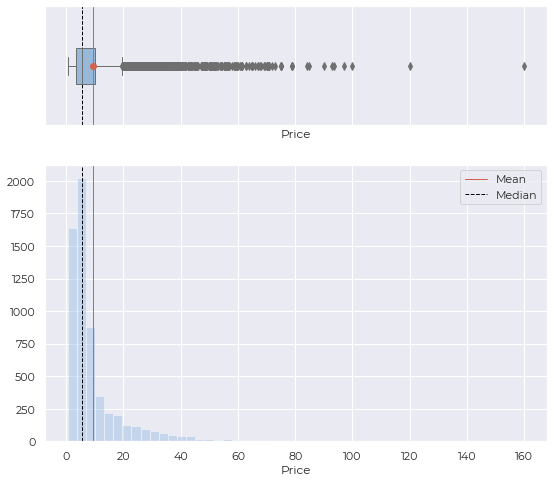

Price 
Mean:  9.48 
Median:  5.64


In [1046]:
hist_box(data.Price)

Our dependent variable, Price, is right skewed. Its Mean is 9.48 (1 Lakh = 100,000), and it's median is 5.64
Before we model, we'll need to trnasform this so its more normally distributed

#### Observing the distribution of all numerical variables

We've explored Price above, now we will explore the distribution of all our numerical variables using a grid of sub plots

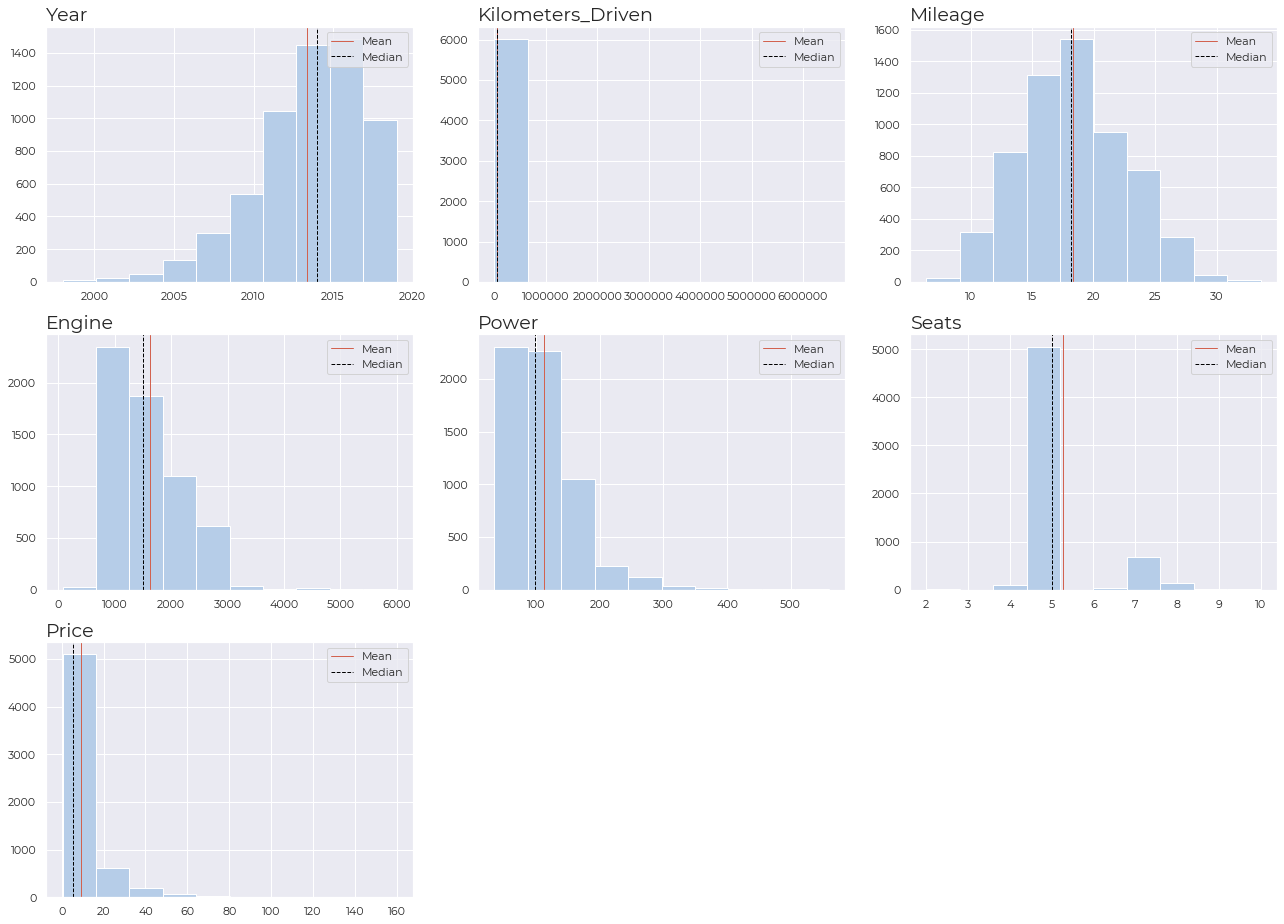

In [1047]:
# Lets plot histograms of all numerical variables
# We are plotting mean and median lines on the plots to 
# help confirm our observations on skewness in the data
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 13))

for i in range(len(num_cols)):
    plt.subplot(3, 3, i + 1)
    plt.hist(data[num_cols[i]], color = '#B6CDE8') 
    # show the average line 
    plt.axvline(data[num_cols[i]].mean(), color='#d2624f', linestyle='solid', linewidth = 1, label = 'Mean')
    # show the median line
    plt.axvline(data[num_cols[i]].median(), color='black', linestyle='dashed', linewidth = 1, label = 'Median')   
    plt.legend(loc = 'upper right')  
    plt.tight_layout()
    plt.title(num_cols[i], fontsize = 19, loc = 'left')
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR2-NUMHIST.png', pad_inches=0)
plt.show()

**Observations**

* Mileage seems to show a normal distribution 
* Year is left skewed
* All other variables show different varying degrees of right skewness except perhaps Kilometers Driven

#### Observing the categorical variables

We will explore the categorical variables using a grid of count plots

### Location, Fuel Type, Transmission, and  Owner Type

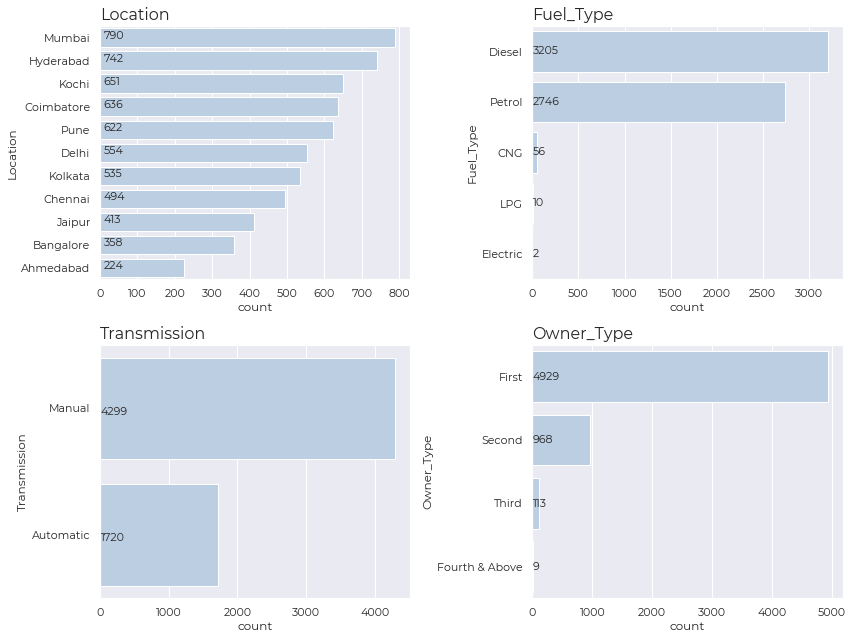

In [1048]:
# Lets plot countplots of categorical variables using a 'for' loop 
cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'] # columns to plot

plt.figure(figsize=(12, 13)) # set size

for i in range(len(cat_cols)): # loop over 'cols'
        
    plt.subplot(3, 2, i + 1) # grid of subplots
    order = data.groupby(cat_cols[i])[cat_cols[i]].count().sort_values(ascending = False).index.values # order by count 
    g1 = sns.countplot( y = data[cat_cols[i]], color = "#B6CDE8" , order = order) # plot count plot
    
    # another for loop to label our counts
    for p in g1.patches:
        label = (p.get_width()) # Value from x-axis
        x = 10 # keep labels at far left of x-axis to improve readability
        y = p.get_y() + p.get_height()/ 2 + 0.05 # y-axis position of label
        g1.annotate(label, (x,y), size = 11) # Annotate the plot
        #g1.xaxis.set_visible(False)
    plt.tight_layout()
    plt.title(cat_cols[i], fontsize = 16, loc = 'left')
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR3-CATCOUNTS.png', pad_inches=0)
plt.show()

#### Observations 

* Mumbai has the most cars available for sale, Ahmedabad has the least. 
* Most cars are of Diesel Fuel type, followed by Petrol. Very few cars use CNG and barely any are electric and LPG
* Most cars have Manual transmissions
* Most cars have been previously sold only once i.e. to the first owner
* Barely any cars have been previously sold 4 or more times

Later we'll consider dropping Electric cars since there are only 2 in the sample

#### Let's explore car Brands

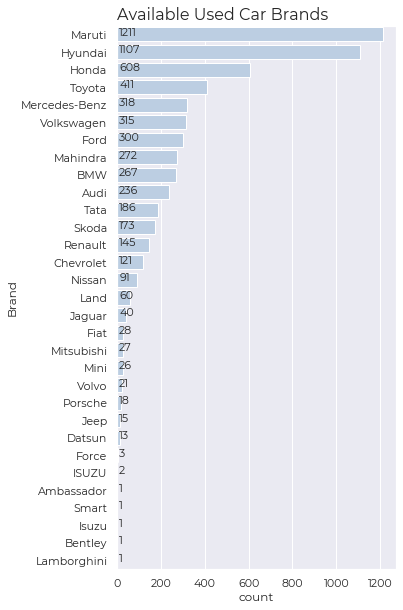

In [1049]:
plt.figure(figsize = (5,10))

order = order = data.groupby('Brand')['Brand'].count().sort_values(ascending = False).index.values
gg = sns.countplot(y = data['Brand'], order = order, color = "#B6CDE8")

for p in gg.patches:
        label = (p.get_width()) # Value from x-axis
        x = 10 # keep labels at far left of x-axis to improve readability
        y = p.get_y() + p.get_height()/ 2 + 0.05 # y-axis position of label
        gg.annotate(label, (x,y), size = 11) 
        plt.title('Available Used Car Brands' , fontsize = 16, loc = 'left') 
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR4-LOCS.png', pad_inches=0)
plt.show()

**Observations**

* Maruti and Hyundai brand have the most cars available for sale
* Isuzu, Force, Bentley, Ambassador, OpelCorsa, Hindustan, Smart, and Lamborghini brand have the least amount of cars available in the used car data set

## Bivariate

Let's view the correlation between our variables

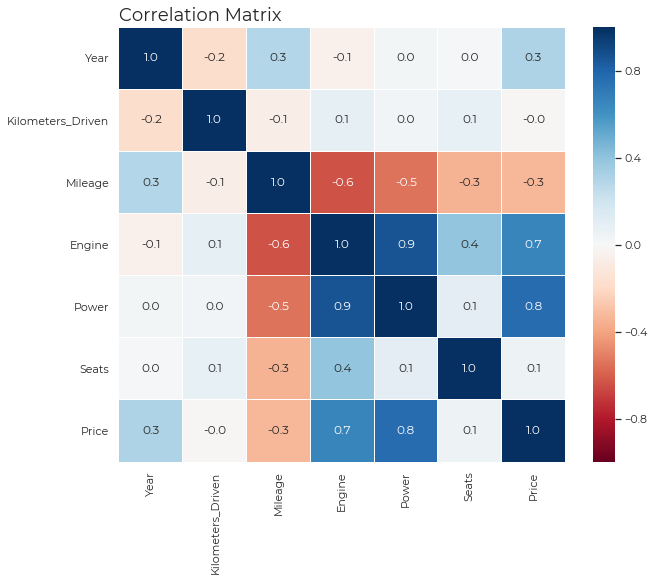

In [1050]:
corr = data.corr() # create the correlation matrix
plt.figure(figsize=(10,8)) # set the figure size

# create the heatmap and plot with our correlation matrix
sns.heatmap(corr, annot = True, cmap = 'RdBu', linecolor='white', linewidths=0.01, 
            fmt='.1f', vmin = -1, vmax = 1)

plt.title("Correlation Matrix", fontsize = 18, loc = 'left') 
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR5-CORR.png', pad_inches=0)
plt.show()



* **Engine** and **Power** have the most correlation with **Price** : 0.7 and 0.8 respectively
* **kilometers_Driven** does not have any noticeable correlation with price
* **Year**, **Seats** and **Mileage** have low correlation with price
* There is negative correlation between **Engine** and **Mileage** (-0.6) : As the Engine gets bigger, mileage offered decreases
* There is negative correlation between **Power** and **Mileage** (-0.5) : The higher the power of the car, the lower the mileage offered

Power and Engine are highly correlated and we realise that this may cause issues in our model that may require addressing later


## Multivariate 

Let's explore how some of the variables interact with each other

### Price, Power, and Transmission 

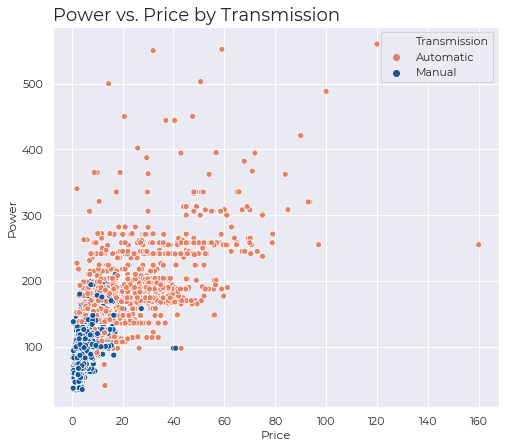

In [1051]:
plt.figure(figsize = (8,7)) # set size 

# plot scatterplot with Price and Power on X and Y, and Transmission on Hue
sns.scatterplot(x = 'Price', y = 'Power', hue = 'Transmission', palette = ['#e48066','#195696'], data = data) 
plt.title("Power vs. Price by Transmission", fontsize = 18, loc = 'left') 
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR6-MULTI.png', pad_inches=0)
plt.show()

**Observations**

* Cars with Manual transmissions appear to have lower power, and are also priced lower when compared to cars with Automatic transmissions

### Price, Engine, and Owner_Type

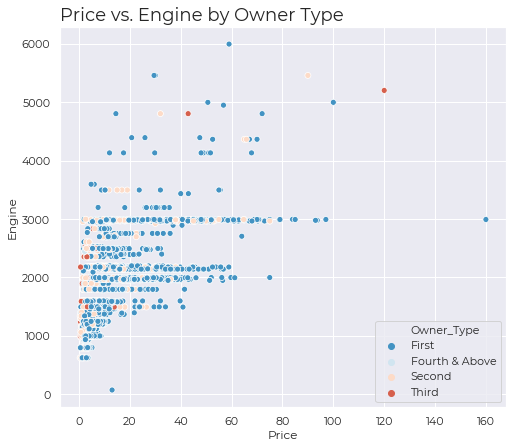

In [1052]:
plt.figure(figsize = (8,7)) # set size 

# plot scatterplot with Price and Power on X and Y, and Transmission on Hue
sns.scatterplot(x = 'Price', y = 'Engine', data = data, hue = 'Owner_Type', palette = 'RdBu_r') 
plt.title("Price vs. Engine by Owner Type", fontsize = 18, loc = 'left') 
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR7-MULTI2.png', pad_inches=0)
plt.show()

**Observations**

* Cars that have been previously three times (Owner_Type = Third) tend to mainly be on the lower end of the price scale. 
* Most cars have Owner_Type = First i.e they have been previously sold once to the original owner
* There is car that was previously sold three times but still costs more than most of the vehicles in the dataset - Its likely a Lamborgini, Bentley, or one of the really expensive cars we saw earlier on with only 1 or 2 available for sale
* Most cars have engine sizes less than 4000 CC and Prices less than 100 (1 Lakh = 100,000) but there are few cars with engine sizes > 4000 CC and even less cars that cost more than 100 Lakhs

### Check for Outliers

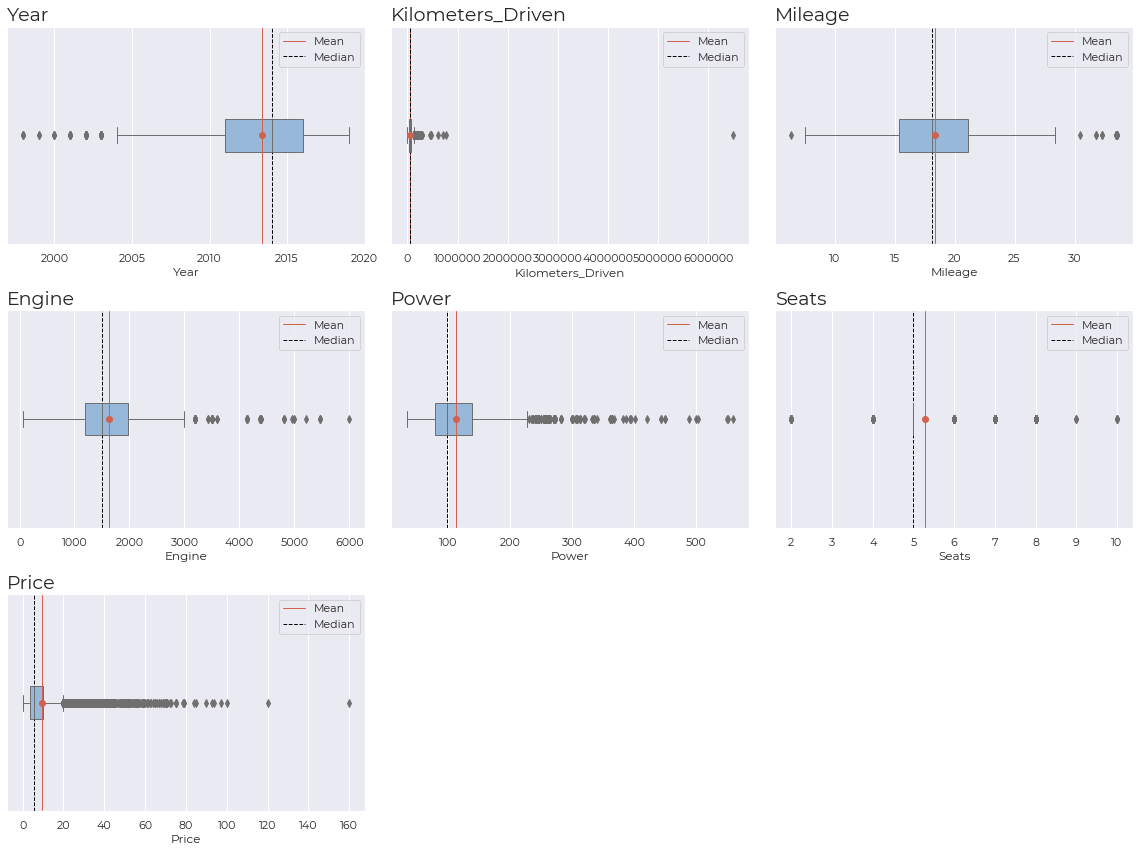

In [1053]:
# let's plot boxplots of all columns to check for outliers
plt.figure(figsize = (16,12)) # set size
cols2check = data.select_dtypes(include = np.number).columns.tolist() # get numerical columns

for i, check_col in enumerate(cols2check): 
    meanpointprops = dict(marker='o', markeredgecolor='#d2624f',markerfacecolor='#d2624f') #formatting for mean point
    plt.subplot(3, 3, i + 1) # grid
    sns.boxplot(x = data[check_col], width = 0.15, linewidth = 1, color = '#8DB7E5', 
                showmeans = True, meanprops = meanpointprops) # boxplot
    plt.axvline(data[check_col].mean(),color = '#d2624f', linestyle = 'solid',linewidth = 1, label = 'Mean') # mean line
    plt.axvline(data[check_col].median(),color = 'black', linestyle = 'dashed',linewidth = 1, label = 'Median')# median
    plt.legend(loc = 'upper right') # legend

    plt.tight_layout()
    plt.title(check_col, size = 19, loc = 'left')
    
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR8-OUTLIERS.png', pad_inches=0)

plt.show()

**Observations**

* All columns appear to have outliers
* **Year** has lower outliers
* **Kilometers_Driven**, **Engine**, **Power**, and **Price** have upper outliers
* **Mileage**, has upper and lower outliers
* There isn't much variation in Seats so we have random points scattered on the scale

The next step here will be to treat outliers but it always helps to study them further, with the goal of ensuring that in removing outliers, we are not removing valuable data. For example, I know that here, some of the outliers in price are rare brands and significantly higher priced vehicles which are not representative of the overall sample. 
Becasue the goal is to have a model that can accurately predict on as many different and varied data sets, treating outliers is important so that they do not skew the predictive power of our model.  

### Treat Outliers 

As we already know, by defintion, an outlier is a data point that differs significantly from other observations in a sample.
Statistically, one way to identify an outlier is using the 1.5 x IQR rule. i.e. any point outside 1.5*IQR is considered an outlier.
We will use this identification method as the foundation for how we will treat these outliers

In [1054]:
# Trim outliers by removing the points outside the upper and lower whiskers
def trim_outliers(df, col):
    
    Q1 = df[col].quantile(0.25) # Q1 = 25th percentile
    Q3 = df[col].quantile(0.75) # Q3 = 75th precentile
    IQR = Q3 - Q1 # definition of inter-quartile range
    Lower = Q1 - 1.5 * IQR
    Upper = Q3 + 1.5 * IQR
    
    # All values outside the upper and lower whisker will be 
    # assigned the values of the upper and lower whisker respectively 
    df[col] = np.clip(df[col], Lower, Upper)
    return df

# Treat columns by applying the function above

def treat_columns(df, columns): # takes a dataframe and a list of columns
    
    for c in columns: # for each column in the list of columns...
        df = trim_outliers(df, c) # treat outliers in the column
    return df # return the dataframe 

In [1055]:
# Treat outliers
cols2treat = data.select_dtypes(include = np.number).columns.tolist() # get numerical columns
cols2treat.remove('Seats') # We won't treat seats
data = treat_columns(data, cols2treat)

Let us revisit the distributions of our numerical columns to see how it's changed after outlier treatment

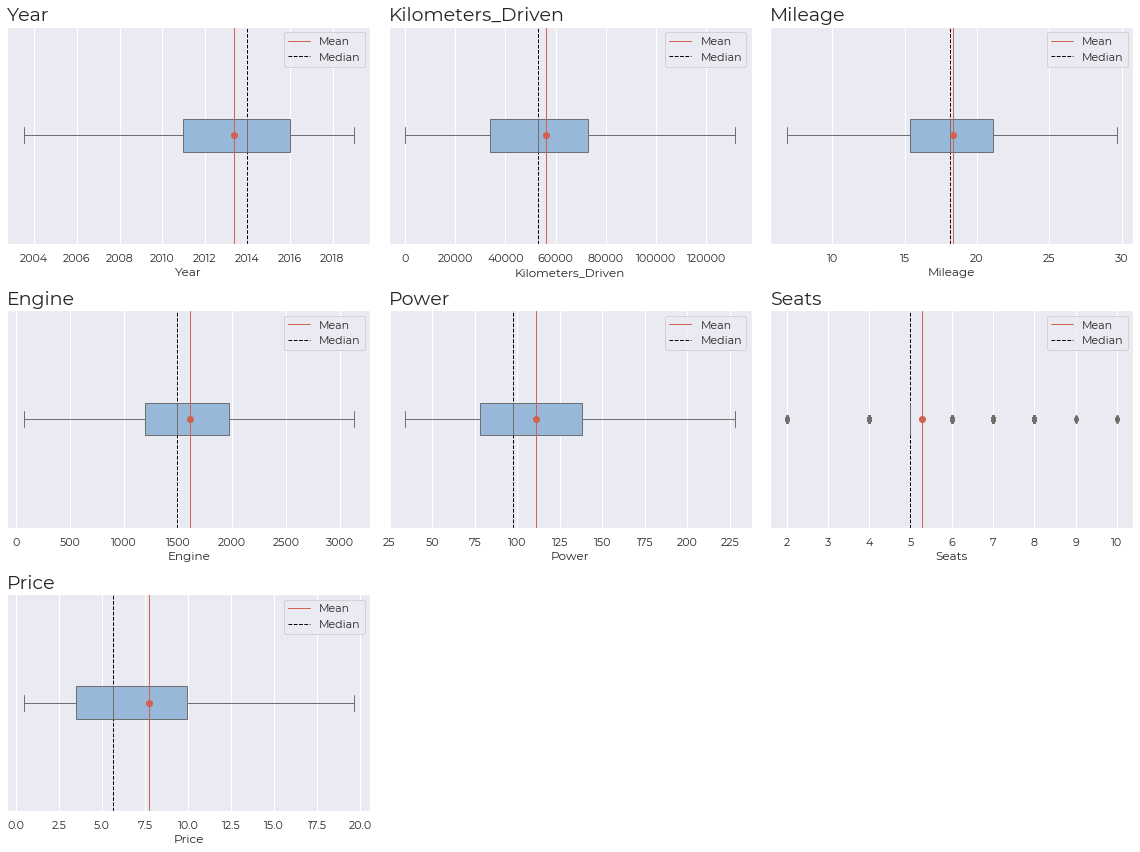

In [1056]:
# let's plot boxplots of all columns to check for outliers
plt.figure(figsize = (16,12)) # set size
cols2check = data.select_dtypes(include = np.number).columns.tolist() # get numerical columns

for i, check_col in enumerate(cols2check): 
    meanpointprops = dict(marker='o', markeredgecolor='#d2624f',markerfacecolor='#d2624f') #formatting for mean point
    plt.subplot(3, 3, i + 1) # grid
    sns.boxplot(x = data[check_col], width = 0.15, linewidth = 1, color = '#8DB7E5', 
                showmeans = True, meanprops = meanpointprops) # boxplot
    plt.axvline(data[check_col].mean(),color = '#d2624f', linestyle = 'solid',linewidth = 1, label = 'Mean') # mean line
    plt.axvline(data[check_col].median(),color = 'black', linestyle = 'dashed',linewidth = 1, label = 'Median')# median
    plt.legend(loc = 'upper right') # legend

    plt.tight_layout()
    plt.title(check_col, size = 19, loc = 'left')
    
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR9-NO-OUTLIERS.png', pad_inches=0)

plt.show()

**Observation** - We no longer observe any outliers in our columns

Let's review the distribution of our columns

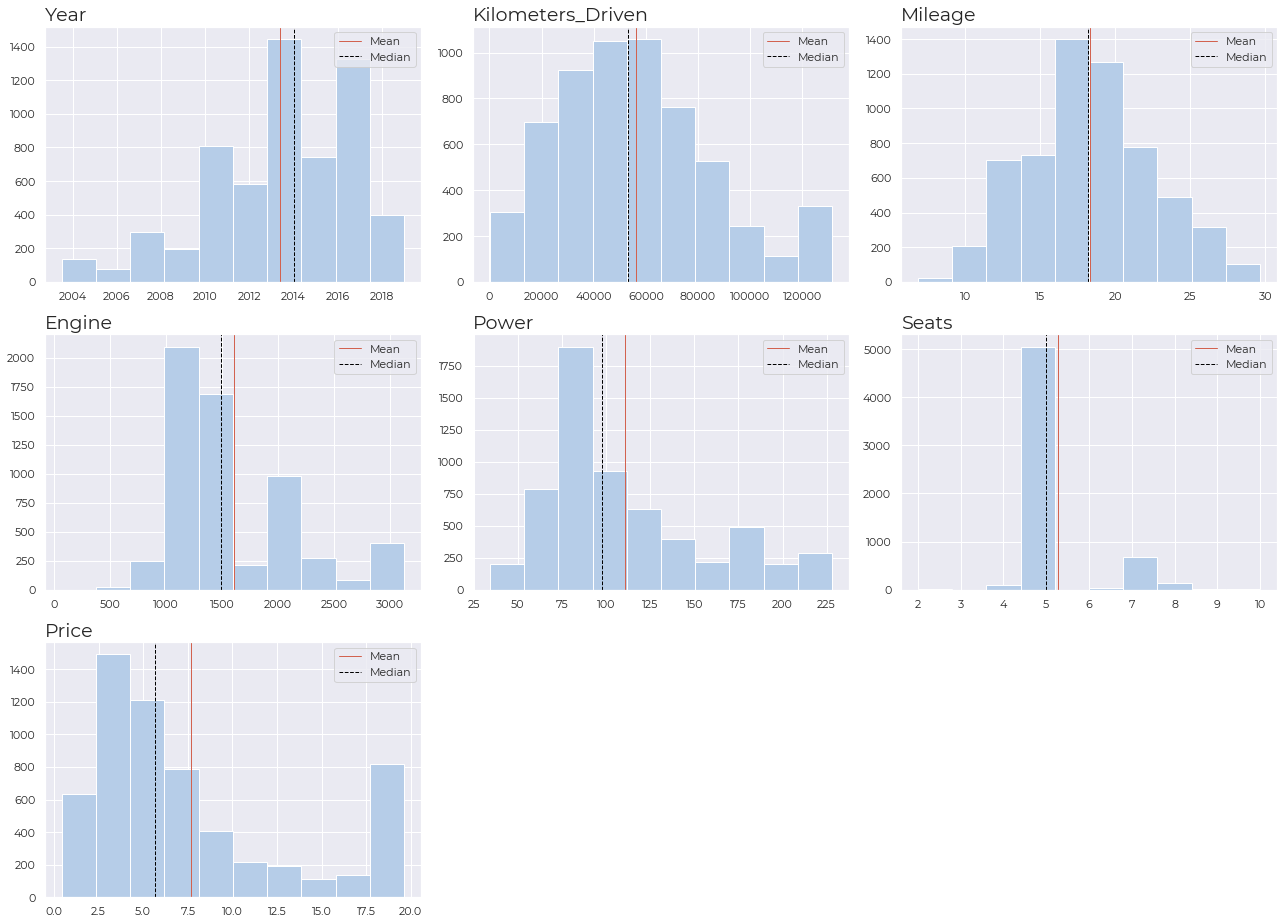

In [1057]:
# Lets plot histograms of all numerical variables
# We are plotting mean and median lines on the plots to 
# help confirm our observations on skewness in the data
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 13))

for i in range(len(num_cols)):
    plt.subplot(3, 3, i + 1)
    plt.hist(data[num_cols[i]], color = '#B6CDE8') 
    # show the average line 
    plt.axvline(data[num_cols[i]].mean(), color='#d2624f', linestyle='solid', linewidth = 1, label = 'Mean')
    # show the median line
    plt.axvline(data[num_cols[i]].median(), color='black', linestyle='dashed', linewidth = 1, label = 'Median')   
    plt.legend(loc = 'upper right')  
    plt.tight_layout()
    plt.title(num_cols[i], fontsize = 19, loc = 'left')
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR10-NO-OUTLIERS2.png', pad_inches=0)
plt.show()

Things look better. We'll move forward

Let's check for any left over steps to perform before we begin modeling

In [1058]:
# view summary of all cols
data.describe(include = 'all').T.fillna('-')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019.000,11,Mumbai,790,-,-,-,-,-,-,-
Year,6019.000,-,-,-,2013.374,3.214,2003.500,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,6019.000,-,-,-,56106.897,30040.627,171.000,34000.000,53000.000,73000.000,131500.000
Fuel_Type,6019.000,5,Diesel,3205,-,-,-,-,-,-,-
Transmission,6019.000,2,Manual,4299,-,-,-,-,-,-,-
Owner_Type,6019.000,4,First,4929,-,-,-,-,-,-,-
Mileage,6019.000,-,-,-,18.332,4.127,6.850,15.400,18.150,21.100,29.650
Engine,6019.000,-,-,-,1612.268,567.841,72.000,1198.000,1493.000,1969.000,3125.500
Power,6019.000,-,-,-,110.837,46.037,34.200,78.000,97.700,138.030,228.075
Seats,6019.000,-,-,-,5.278,0.803,2.000,5.000,5.000,5.000,10.000


### Let's convert Year to Vehicle Age so it's easier to interpret

In [1059]:
from datetime import date 

today = date.today() #todays date
Age = today.year - data['Year'] # age is current year minus year of manufacture

data['Age'] = Age.astype('int64') # we want integers
data.drop('Year', axis = 1, inplace = True) # drop it for good

np.random.seed(1)
data.sample(8) # view a sample

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Age
2319,Coimbatore,9312,Diesel,Automatic,First,18.000,2987.000,228.075,5,19.625,Mercedes-Benz,2
3652,Coimbatore,77325,Petrol,Manual,First,15.600,1586.000,104.680,5,3.510,Maruti,13
2397,Kolkata,21460,Petrol,Manual,First,17.000,1497.000,121.360,5,6.000,Ford,5
3536,Kochi,11966,Petrol,Manual,First,16.800,1497.000,116.300,5,10.280,Honda,3
4400,Kolkata,46000,Petrol,Manual,First,15.260,1598.000,103.500,5,2.350,Volkswagen,10
5347,Mumbai,11000,Petrol,Manual,First,24.700,796.000,47.300,5,3.350,Maruti,3
2852,Bangalore,36000,Diesel,Automatic,First,15.000,2147.000,107.300,5,16.250,Mercedes-Benz,7
4894,Hyderabad,24000,Diesel,Manual,First,27.390,1248.000,74.000,5,8.400,Maruti,4


#### Let's confirm there are no issues with the new age column

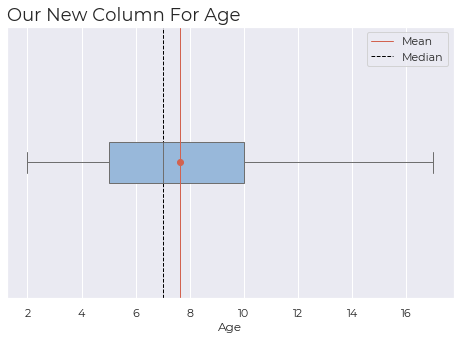

In [1060]:
plt.figure(figsize = (8,5))
meanpointprops = dict(marker='o', markeredgecolor='#d2624f',markerfacecolor='#d2624f') #formatting for mean point
sns.boxplot(x = data['Age'], width = 0.15, linewidth = 1, color = '#8DB7E5', 
                showmeans = True, meanprops = meanpointprops) # boxplot
plt.axvline(data['Age'].mean(),color = '#d2624f', linestyle = 'solid',linewidth = 1, label = 'Mean') # mean line
plt.axvline(data['Age'].median(),color = 'black', linestyle = 'dashed',linewidth = 1, label = 'Median')# median
plt.legend(loc = 'upper right')
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR11-AGENEW.png', pad_inches=0)
plt.title("Our New Column For Age" , size = 18, loc = "left")
plt.show()

**Observation** : Our age column looks good 

### Combine Isuzu and ISUZU

In [1061]:
# Review brands
data['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Smart               1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

In [1062]:
#Replace Isuzu with ISUZU and confirm 

data['Brand'] = data['Brand'].str.replace('ISUZU', 'Isuzu')
data['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
Isuzu               3
Smart               1
Bentley             1
Ambassador          1
Lamborghini         1
Name: Brand, dtype: int64

Both columns have become one becuase we replaced the name of one with the other, causing them to merge

### Drop Brands Force --> Bentley 
We'll drop rows that have the Brands and check to ensure they are being dropped, and at the end we'll do a final confirmation

In [1063]:
# drop Bentley
data = data[data.Brand != 'Bentley']
len(data)

6018

In [1064]:
# drop Lambo
data = data[data.Brand != 'Lamborghini']
len(data)

6017

In [1065]:
# drop Ambassador
data = data[data.Brand != 'Ambassador']
len(data)

6016

In [1066]:
# drop Isuzu
data = data[data.Brand != 'ISUZU']
len(data)

6016

In [1067]:
# drop Force
data = data[data.Brand != 'Force']
len(data)

6013

In [1068]:
# drop Smart
data = data[data.Brand != 'Smart']
len(data)

6012

#### We are done, now let's confirm 

In [1069]:
# Review Brands
print("Brands Left")
print(len(data['Brand'].value_counts()))

Brands Left
25


In [1070]:
data['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Name: Brand, dtype: int64

Counts look much better, the names are unique now. 

### Let's transform Price and Power so they are less skewed
We'll use a power(sqrt) transformation 

We'll also write a function to plot price before and after so we can see the results

In [1071]:
# Let's transform our Price variable to make it more normal
def hist_x2(col1, col2, bins = 40):       
    """
    col:(column in dataset)
    """ 
    fig,(ax1,ax2) = plt.subplots(ncols = 2, sharey = True, gridspec_kw = {"width_ratios":(.50, .50)}, figsize = (15,4))
    # create the histogram
    sns.distplot(col1, ax=ax1, kde=False, color = '#8DB7E5') # We will be showing the kde line on our histograms
    #ax1.axvline(col1.mean(), color='#d2624f', linestyle='solid', linewidth = 1, label = 'Mean') # show the average line 
    ax1.axvline(col1.median(), color='#d2624f', linestyle='solid', linewidth = 1, label = 'Median') # show the median line 
    # create the histogram #2
    sns.distplot(col2, ax=ax2, kde=False, color = '#8DB7E5') # We will be showing the kde line on our histograms
    #ax2.axvline(col2.mean(), color='#d2624f', linestyle='solid', linewidth = 1, label = 'Mean') # show the average line 
    ax2.axvline(col2.median(), color='#d2624f', linestyle='solid', linewidth = 1, label = 'Median') # show the median line 
    plt.legend(loc = 'upper right')
    plt.show()
    

In [1072]:
Price_transformed = pd.DataFrame({'Price_Power': np.sqrt(data['Price'])}) # create a new dataframe with transformed values 

### Transform Price

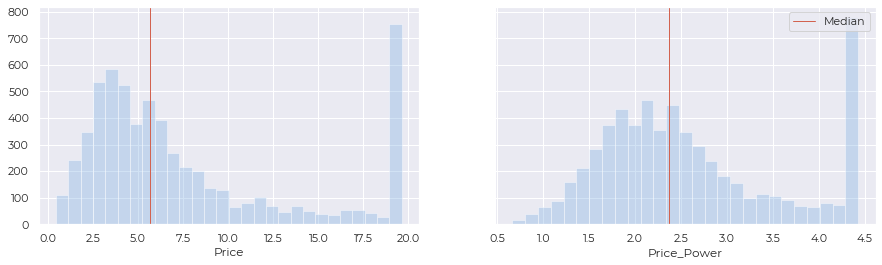

<Figure size 432x288 with 0 Axes>

In [1226]:
hist_x2(data['Price'],Price_transformed['Price_Power']) # Plot before and After 
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR12-PP.png')
plt.show()

### Transform Power

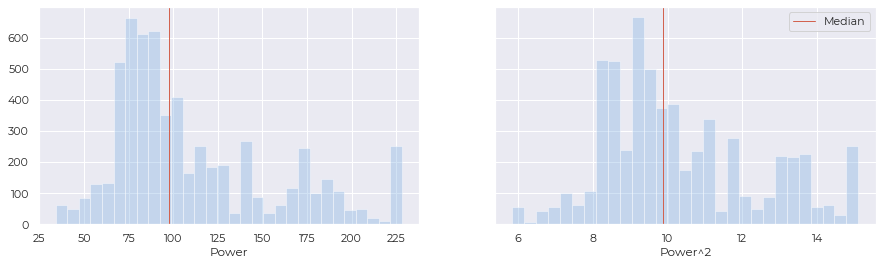

<Figure size 432x288 with 0 Axes>

In [1074]:
Power_transformed = pd.DataFrame({'Power^2': np.sqrt(data['Power'])})
hist_x2(data['Power'],Power_transformed['Power^2'])
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR13-POWERBEFOREAFTER.png', pad_inches=0)
plt.show()

These are just remnants of when we were experimenting with transformations 

In [1075]:
#km_transformed = pd.DataFrame({'km^2': np.sqrt(data['Kilometers_Driven'])})
#hist_x2(data['Kilometers_Driven'],km_transformed['km^2'])

In [1076]:
#Eng_transformed = pd.DataFrame({'en^2': np.sqrt(data['Engine'])})
#hist_x2(data['Engine'],Eng_transformed['en^2'])

In [1077]:
#Age_transformed = pd.DataFrame({'age^2': np.sqrt(data['Age'])})
#hist_x2(data['Age'],Age_transformed['age^2'])

### Price is a bit better now ...

Let's do some final checks

In [1097]:
data.isna().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Age                  0
dtype: int64

In [1099]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6012 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6012 non-null   category
 1   Kilometers_Driven  6012 non-null   int64   
 2   Fuel_Type          6012 non-null   category
 3   Transmission       6012 non-null   category
 4   Owner_Type         6012 non-null   category
 5   Mileage            6012 non-null   float64 
 6   Engine             6012 non-null   float64 
 7   Power              6012 non-null   float64 
 8   Seats              6012 non-null   int64   
 9   Price              6012 non-null   float64 
 10  Brand              6012 non-null   category
 11  Age                6012 non-null   int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 406.8 KB


In [1081]:
#data['Power'] = Power_transformed
#data['Engine'] = Eng_transformed
#data['Kilometers_Driven'] = km_transformed
#data['Age'] = Age_transformed

## DATA PREP BEFORE WE MODEL

#### Define X and y Variables

In [1100]:
# define X and y
X = data.drop('Price', axis = 1)
y = Price_transformed[['Price_Power']]

In [1101]:
# Let's inspect X
print(f'Shape of X:{X.shape}\n')
print('\033[4m' + 'A Sample of 5 Rows' + '\033[0m') 
np.random.seed(2)
X.sample(5)

Shape of X:(6012, 11)

A Sample of 5 Rows


,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Age
1422,Mumbai,54890,Petrol,Manual,Second,17.800,1199.000,76.800,5,Chevrolet,7
5507,Pune,48000,Diesel,Manual,First,28.400,1248.000,73.750,5,Maruti,4
982,Bangalore,47037,Diesel,Manual,Second,22.770,1498.000,98.590,5,Ford,6
5381,Mumbai,48823,Petrol,Manual,First,20.730,1373.000,91.100,5,Maruti,6
1300,Hyderabad,120000,Diesel,Manual,First,12.800,2494.000,102.000,7,Toyota,9


In [1102]:
# Let's inspect y
print(f'Shape of y:{y.shape}\n')
print('\033[4m' + 'A Sample of 5 Rows' + '\033[0m') 
np.random.seed(3)
y.sample(5)

Shape of y:(6012, 1)

A Sample of 5 Rows


,Price_Power
4722,4.430
4740,2.179
808,2.225
1587,1.800
779,1.208


#### Create Dummy Variables for Our Categorical Variables

In [1103]:
# view categories
data.describe(include='category').T

,count,unique,top,freq
Location,6012,11,Mumbai,790
Fuel_Type,6012,5,Diesel,3200
Transmission,6012,2,Manual,4295
Owner_Type,6012,4,First,4925
Brand,6012,25,Maruti,1211


In [1104]:
X = pd.get_dummies(X, columns = ['Location','Fuel_Type','Transmission','Owner_Type','Brand'], drop_first = True)
np.random.seed(3)
X.sample(5)

,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
4722,35000,8.100,3125.500,228.075,2,11,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4740,61510,25.800,1498.000,98.600,5,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
808,60669,16.800,1497.000,116.300,5,8,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1587,33000,19.400,1198.000,86.800,5,8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
779,17088,18.600,1199.000,79.400,5,11,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Split the Data into Test and Training Sets

In [1206]:
from sklearn.model_selection import train_test_split # import function 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1000) # split into train and test

## CHOOSE, TRAIN, AND EVALUATE OUR MODEL

#### Fit the Model on Training Data - 70% of Sample

In [1207]:
from sklearn.linear_model import LinearRegression

linR = LinearRegression()
linR.fit(X_train,y_train)

LinearRegression()

### View Coefficients

In [1208]:
coeff = pd.DataFrame(np.append(linR.coef_[0], linR.intercept_[0]), # show intercept and coeffs
                     index = X_train.columns.to_list() + ["Intercept"], 
                     columns = ["Coefficients"] )
coeff

,Coefficients
const,-0.000
Kilometers_Driven,-0.000
Mileage,-0.020
Engine,0.000
Power,0.007
Seats,0.045
Age,-0.121
Location_Bangalore,0.098
Location_Chennai,0.012
Location_Coimbatore,0.051


### Let's review the model performance by creating a function to print some metrics:

* Mean Absolue Percentage Error **(MAPE)** - measures the accuracy of predictions as a percentage, and is the average absolute percent error for each predicted value minus actual value divided by the actual value. This is impacted by the presence of zero's and extreme values in the data set


* Mean Absolute Error **(MAE)** - This takes the absolute value of the residual for every data point, so that negative and positive residuals do not cancel out, averages it out. MAE describes magnitude of the residuals in prediction.


* Root Mean Square Error **(RMSE)** - This is similar to MAE, but squares the residuals before summing them, rather than taking the absolute value. After this, the square root of that value is calculated.


* Coefficient of Determination **(R$^2$)** - This represents the proportion of variance in y that is explained by the independent variables in the model. It provides an indication of goodness of fit for the model. 1.0 is the max, and values can be negative, indicating a bad model. A value of 0 is scored on a model that always predicts the dependent variable while ignoring all the input variables.

In [1209]:
# Create function to show metrics

# This first one calculates MAPE
def MAPE(targ, predic):
    return np.mean(np.abs(targ - predic) / targ) * 100

# This one printsthem all out 
def performance(model, inputt, output):
    
    y_predict = model.predict(inputt).flatten()
    y_actual = output.values.flatten()
    
    return pd.DataFrame({"MAE" : mean_absolute_error(y_actual, y_predict),
                        "MAPE" : MAPE(y_actual, y_predict),
                        "RMSE" : np.sqrt(mean_squared_error(y_actual, y_predict)),
                         "R^2" : r2_score(y_actual, y_predict)}, index = ['Values'])

#### Let's view the performance of our model on training and testing data

In [1210]:
# This is 70% of the original data

print('\033[4m' + 'Training Performance' + '\033[0m') 
performance(linR, X_train, y_train)

Training Performance


,MAE,MAPE,RMSE,R^2
Values,0.220,9.145,0.294,0.911


In [1211]:
# This is 30% of the original data

print('\033[4m' + 'Test Performance' + '\033[0m') 
performance(linR, X_test, y_test)

Test Performance


,MAE,MAPE,RMSE,R^2
Values,0.215,8.972,0.285,0.915


**Observations**

* The train and test scores are 91% and 92% respectively - The scores are comparable, and so assuming there aren't too many issues with the model, this is a good starting point. I'd expect R^2 to change a little as we test regression assumptions on our model. 

* **R$^2$** of 92% on test data is good and let's us know the model explans 92% of the variation within the data.
* **MAE** is really low and that is good. It tells us we can predict the price of a used car within 0.22 Lakhs.
* **MAPE** translates to a 9% level of accuracy of our prediction ie. we can predict it within 9% of the actual price, using our model. **RMSE** is also really low so that is good

### Using Statsmodels

In [1186]:
# Let's build linear regression model using statsmodel
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1000)
ols0 = sm.OLS(y_train, X_train1)
olsres0 = ols0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Power   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     884.0
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:24:59   Log-Likelihood:                -815.39
No. Observations:                4208   AIC:                             1729.
Df Residuals:                    4159   BIC:                             2040.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Our constant is 3.45 and we can see the list of co-efficients. We'll do more before we start to interpret.

## CHECK LINEAR REGRESSION ASSUMPTIONS

* No Multicollinearity
* Mean of residuals should be 0
* No Heteroscedasticity
* Linearity of variables
* Normality of error terms

### Multicollinearity

**Variance Inflation factor:** Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities among variables. It measures how much the variance of the estimated regression coefficient  𝛽𝑘  is "inflated" by correlation among the predictor variables.

If VIF is 1 then there is no correlation among the 𝑘th predictor and the remaining predictor variables - The variance of  𝛽𝑘  is not inflated. If VIF exceeds 5, there is moderate multicollinearity, and if it is 10 or more, it signals high multicollinearity.

In [1187]:
# Let's take the first attempt at viewing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
print("VIF Scores: \n{}".format(vif_series1))

VIF Scores: 
const                       569.050
Kilometers_Driven             1.957
Mileage                       4.064
Engine                        9.374
Power                         8.363
Seats                         2.511
Age                           2.200
Location_Bangalore            2.486
Location_Chennai              3.007
Location_Coimbatore           3.541
Location_Delhi                3.175
Location_Hyderabad            3.843
Location_Jaipur               2.703
Location_Kochi                3.591
Location_Kolkata              3.141
Location_Mumbai               4.018
Location_Pune                 3.455
Fuel_Type_Diesel             28.749
Fuel_Type_Electric            1.052
Fuel_Type_LPG                 1.197
Fuel_Type_Petrol             29.523
Transmission_Manual           2.338
Owner_Type_Fourth & Above     1.016
Owner_Type_Second             1.179
Owner_Type_Third              1.108
Brand_BMW                     2.122
Brand_Chevrolet               1.847
Brand_Datsun   

**Observation** - **Fuel_Type_Petrol ** and **Fuel_Type_Diesel** are correlated with each other as they have really high VIF scores. We need to drop one.

1. Look for columns with high VIF values. Greater than 5 is our cut-off
2. Drop values and continue until there are none with high VIF values, while preserving th model performance by keeping R$^2$ as close to original as possible

In [1188]:
# we drop fuel type petrol as it has the highest value
X_train2 = X_train1.drop("Fuel_Type_Petrol", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)# new scores
print("VIF Scores: \n{}".format(vif_series2)) # print new scores

VIF Scores: 
const                       397.072
Kilometers_Driven             1.899
Mileage                       3.895
Engine                        9.401
Power                         8.352
Seats                         2.490
Age                           2.188
Location_Bangalore            2.461
Location_Chennai              2.926
Location_Coimbatore           3.642
Location_Delhi                3.225
Location_Hyderabad            3.715
Location_Jaipur               2.633
Location_Kochi                3.566
Location_Kolkata              3.098
Location_Mumbai               4.026
Location_Pune                 3.454
Fuel_Type_Diesel              2.852
Fuel_Type_Electric            1.018
Fuel_Type_LPG                 1.009
Transmission_Manual           2.343
Owner_Type_Fourth & Above     1.015
Owner_Type_Second             1.167
Owner_Type_Third              1.101
Brand_BMW                     2.108
Brand_Chevrolet               1.829
Brand_Datsun                  1.114
Brand_Fiat     

### Fuel Types are good now, and Engine is the next highest
Remove Engine 

In [1189]:

X_train3 = X_train2.drop("Engine", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF Scores: \n{}".format(vif_series3))

VIF Scores: 
const                       385.834
Kilometers_Driven             1.896
Mileage                       3.451
Power                         4.899
Seats                         2.367
Age                           2.184
Location_Bangalore            2.461
Location_Chennai              2.926
Location_Coimbatore           3.642
Location_Delhi                3.225
Location_Hyderabad            3.715
Location_Jaipur               2.633
Location_Kochi                3.565
Location_Kolkata              3.097
Location_Mumbai               4.026
Location_Pune                 3.454
Fuel_Type_Diesel              2.449
Fuel_Type_Electric            1.017
Fuel_Type_LPG                 1.009
Transmission_Manual           2.343
Owner_Type_Fourth & Above     1.015
Owner_Type_Second             1.167
Owner_Type_Third              1.101
Brand_BMW                     2.106
Brand_Chevrolet               1.828
Brand_Datsun                  1.113
Brand_Fiat                    1.174
Brand_Ford     

### Now we'll drop Brand_Maruti as it has the highest value

In [1190]:

X_train4 = X_train3.drop("Brand_Maruti", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("VIF Scores: \n{}".format(vif_series4))

VIF Scores: 
const                       367.592
Kilometers_Driven             1.888
Mileage                       3.391
Power                         4.373
Seats                         2.292
Age                           2.177
Location_Bangalore            2.460
Location_Chennai              2.925
Location_Coimbatore           3.640
Location_Delhi                3.225
Location_Hyderabad            3.715
Location_Jaipur               2.633
Location_Kochi                3.565
Location_Kolkata              3.097
Location_Mumbai               4.025
Location_Pune                 3.452
Fuel_Type_Diesel              2.338
Fuel_Type_Electric            1.017
Fuel_Type_LPG                 1.009
Transmission_Manual           2.219
Owner_Type_Fourth & Above     1.014
Owner_Type_Second             1.166
Owner_Type_Third              1.101
Brand_BMW                     1.654
Brand_Chevrolet               1.091
Brand_Datsun                  1.016
Brand_Fiat                    1.025
Brand_Ford     

All the VIF values are below 5 so let's re-check our model R^2

### Re-Run and get a sense of where we are 

In [1191]:
ols1 = sm.OLS(y_train,X_train4)
olsres1 = ols1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Power   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     830.3
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:26:05   Log-Likelihood:                -1059.0
No. Observations:                4208   AIC:                             2210.
Df Residuals:                    4162   BIC:                             2502.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

R$^2$ is still ok though it reduced it a bit. Now we have no multicollinearity

#### Let's check p-values for variables now that we've removed correlation 
Any variable with a p-value > 0.05 will be dropped.

### Start by dropping Chennai as we see it has p-value greater then 0.05.

In [1192]:
X_train5 = X_train4.drop("Location_Chennai", axis=1)
ols2 = sm.OLS(y_train,X_train5)
olsres2 = ols2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Power   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     849.4
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:26:37   Log-Likelihood:                -1059.0
No. Observations:                4208   AIC:                             2208.
Df Residuals:                    4163   BIC:                             2494.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now Drop LPG Fuel

In [1193]:
X_train6 = X_train5.drop("Fuel_Type_LPG", axis=1)
ols6 = sm.OLS(y_train,X_train6)
olsres6 = ols6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Power   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     869.4
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:26:55   Log-Likelihood:                -1059.1
No. Observations:                4208   AIC:                             2206.
Df Residuals:                    4164   BIC:                             2485.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now drop Porsche

In [1194]:
X_train7 = X_train6.drop("Brand_Porsche", axis=1)
ols7 = sm.OLS(y_train,X_train7)
olsres7 = ols7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Power   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     890.2
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:27:13   Log-Likelihood:                -1059.2
No. Observations:                4208   AIC:                             2204.
Df Residuals:                    4165   BIC:                             2477.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now drop Isuzu

In [1195]:
X_train8 = X_train7.drop("Brand_Isuzu", axis=1)
ols8 = sm.OLS(y_train,X_train8)
olsres8 = ols8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Power   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     911.8
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:27:41   Log-Likelihood:                -1059.8
No. Observations:                4208   AIC:                             2204.
Df Residuals:                    4166   BIC:                             2470.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Drop Mitsubishi

In [1196]:
X_train9 = X_train8.drop("Brand_Mitsubishi", axis=1)
ols9 = sm.OLS(y_train,X_train9)
olsres9 = ols9.fit()
print(olsres9.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Power   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     934.1
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:28:05   Log-Likelihood:                -1061.3
No. Observations:                4208   AIC:                             2205.
Df Residuals:                    4167   BIC:                             2465.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Drop Owner Type 4th

In [1197]:
X_train10 = X_train9.drop("Owner_Type_Fourth & Above", axis=1)
ols10 = sm.OLS(y_train,X_train10)
olsres10 = ols10.fit()
print(olsres10.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Power   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     957.4
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:28:31   Log-Likelihood:                -1063.1
No. Observations:                4208   AIC:                             2206.
Df Residuals:                    4168   BIC:                             2460.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0398    

#### At this point, all features have p-values all less than 0.05 so we can count this as the final model. 

# CHECKPOINT - WORKING FINAL MODEL = OLS10

* **Final Features : X_train10**
* **Final Model : olsres10**

## Let's keep checking
* **Mean of residuals should be 0**
* Linearity of variables
* Normality of error terms
* No Heteroscedasticity


In [1199]:
residual = olsres10.resid
np.mean(residual)

7.915702314153047e-13

#### This is very close to zero so this is good.

### Assumption 1 is satisfied

### Let's keep checking
* **Linearity of variables**
* Normality of error terms
* No Heteroscedasticity

Linearity describes a straight-line relationship between two variables, and predictor variables must have a linear relationship with the dependent variable.

We plot fitted values vs residuals, and in the absence of a pattern, we can say the model is linear, otherwise it shows signs of non-linearity.

If it is non-linear, then a transformation to make it linear would be required 

In [1200]:
residual = olsres10.resid
fitted = olsres10.fittedvalues # Predicted

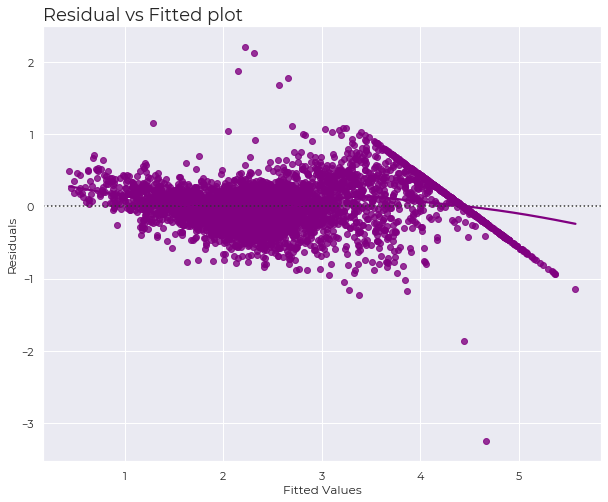

In [1201]:
plt.figure(figsize = (10,8))
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot", fontsize = 18, loc = 'left') 
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR-residualsplot.png', pad_inches=0)
plt.show()

We do not observe any patterns, however at the right tail we see a line forming. This indicates that the model will not perform on higher priced cars.
This is not too surprising given the large bucket of high priced cars we saw in the histogram distribution of Price.
Given that majority of the used cars in the data (~ 90% +) falls outside this highly priced selection, the model will be successful in predicting price majority of the time.
This is what we strive for...a model that is right a wide range of external data, but not necessarily all the data that exists. 

### Assumption 2 is satisfied

### Let's keep checking
* **Normality of error terms**
* No Heteroscedasticity

**Residuals (error terms) should be normally distributed**

If the error terms are not normally distributed, confidence intervals become too wide or narrow, leading to diffculty in estimation of coefficients based on least squares.In the case of non-normailty, data should be explored further with the intent of removing extreme data points to improve model performance 

**To Check:**

1. Plot Histogram of Residuls - Residuals should follow a normal distribution 
2. Confirm using a QQ Plot - Residuals following normal distribution will make an approximate straight line

If non-normality is observed, transformation (or further transformation) should be done to the data

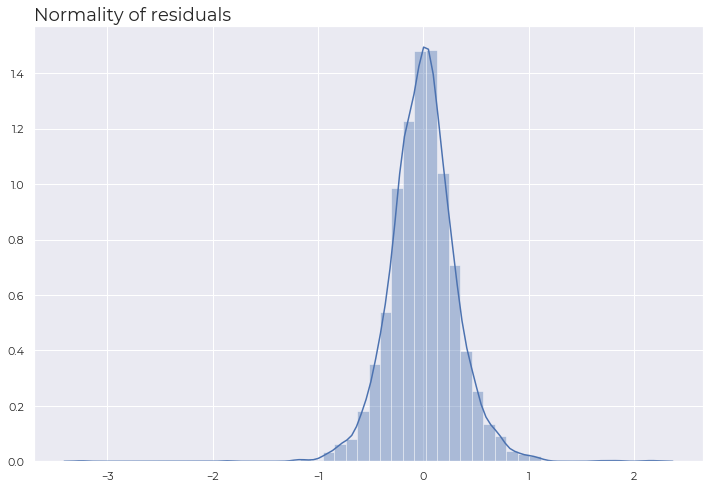

In [1202]:
# plot histogram of residuals
plt.figure(figsize = (12,8))
sns.distplot(residual)
plt.title("Normality of residuals", fontsize = 18, loc = 'left')
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR-residualhist.png', pad_inches=0)
plt.show()

Our residuals are normal

#### Lets confirm using a QQ Plot

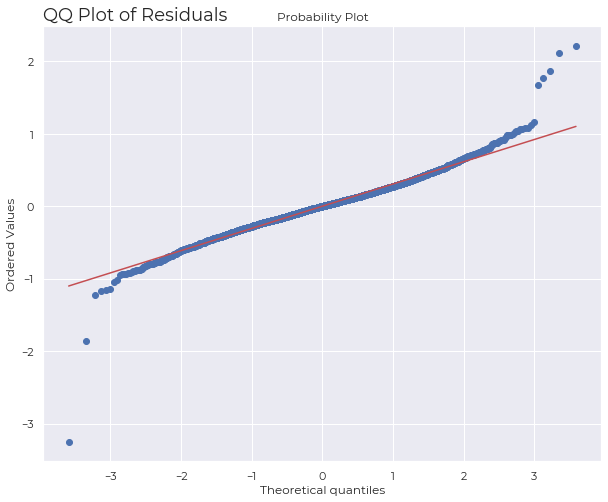

In [1205]:
# plot QQ

import pylab
import scipy.stats as stats # import libraries

plt.figure(figsize = (10,8))
plt.title("QQ Plot of Residuals", fontsize = 18, loc = 'left')
plt.savefig('C:/Users/ffpch/Desktop/PGP-DSBA/CAR-qq.png', pad_inches=0)
stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

Our plot follows the line and this is desired.

### Assumption 3 is satisfied

### Let's keep checking
* **No Heteroscedasticity**

**Test**

We test with **Goldfeldquandt** test

**Heteroscedacity:** If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. They can take any non - symmetrical shape
For goldfeldquandt test, the null and alternate hypotheses are:

* **Null** : Model residuals are homoscedastic
* **Alternate hypothesis** : Model residuals are heteroscedastic

In [1227]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train10)
lzip(name, test)

[('F statistic', 0.9650860390359312), ('p-value', 0.7902098711493265)]

Since p-value > 0.05, we can say that the residuals are homoscedastic

We can now start to predict with this model.

## PREDICTION OF PRICE ON TEST DATA WITH OUR MODEL

In [1212]:
X_train10.columns

Index(['const', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats', 'Age',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Transmission_Manual',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_BMW', 'Brand_Chevrolet',
       'Brand_Datsun', 'Brand_Fiat', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Nissan',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

In [1213]:
X_Test_Final = X_test[X_train10.columns] # Columns for the final model

In [1215]:
np.random.seed(1)
X_Test_Final.sample(5) # view a sample

,const,Kilometers_Driven,Mileage,Power,Seats,Age,Location_Bangalore,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,Brand_Mercedes-Benz,Brand_Mini,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
5799,1.000,19000,21.500,108.500,5,5,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3287,1.000,87900,16.000,140.000,7,6,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3952,1.000,51928,15.600,70.000,5,10,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5120,1.000,41000,16.800,116.300,5,9,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5887,1.000,36000,25.100,98.600,5,5,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Check Performance on Training Data

In [1220]:
print('\033[4m' + 'Training Performance' + '\033[0m') 
performance(olsres10, X_train10.values, y_train)

Training Performance


,MAE,MAPE,RMSE,R^2
Values,0.232,9.654,0.312,0.900


#### Check Performance on Testing Data

In [1221]:
print('\033[4m' + 'Testing Performance' + '\033[0m') 
performance(olsres10, X_Test_Final.values, y_test)

Testing Performance


,MAE,MAPE,RMSE,R^2
Values,0.226,9.420,0.300,0.906


**Observations**

* Both of these results show high **R$^2$** and are comparable. The high score means it explains 90% of variation in the data which is great.

* The train and test scores are 90% and ~91% respectively - They are within 0.006% of each other so not bad.

* **MAE** is really low and that is good. It tells us we can predict the price of a used car within 0.22 lakhs. This is good becasue when we develop pricing strategies, the financial impact would be minimal when we miss the mark, since our prediciton error was low to begin with. 

* **MAPE** is unitless so it translates to a 9% level of accuracy of our prediction ie. we can predict it within 9% of the actual price, using our model. 

* **RMSE** is also really low so that is good as that is desired.


### Interpreting Model Co-efficients

#### Here are the results from our final model ...

In [1222]:
ols10 = sm.OLS(y_train,X_train10)
olsres10 = ols10.fit()
print(olsres10.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_Power   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     957.4
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:58:34   Log-Likelihood:                -1063.1
No. Observations:                4208   AIC:                             2206.
Df Residuals:                    4168   BIC:                             2460.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0398    

This entire time, we have spoken on R$^2$ and so just a comment or Adjusted R$^2$ : It reduced becasue it adjusts for having a high amount of variables. In or case, the minimal drop means our model is sound despite the high amount of variables

# MODEL CONCLUSIONS AND BUSINESS INSIGHTS

In this case, we did not go back to explcitly reverse transform Price by squaring it, but we ideally should reverse transform. In our case, because we used such a simple transformation, Price can be recalculated at the time of interpretation as needed, without much effort. 

## Constant co-efficient
This tells us that if all the features in the model are 0 or non existent, price will be (3.04)$^2$ Lakhs. so 9.24 Lakhs.
We squared Price as : sqrt(Price) = constant co-effs + ... in our case, using np.sqrt. It has to be squared back to the original before interpreting any findings on it.
 
## Car Features
Kilometers, Mileage and Age - For evey unit increase in these three, price goes up by : a negligible amount, 0.001
, and 0.014 Lakhs respectively. For every increase in unit of Power and the number of Seats, the Price goes up by 0.01 (Power was also transformed in the same way as Price, so we read interpret without transforming), and 0.0004 lakhs respectively.The most impactful increase on price out of all these comes from the Age of the vehicle. 

## Location 
The biggest unit increase in price comes when the car is for sale in Kolkata. The impact is a 0.089 Lakh increase in price.
Delhi, Mumbai and, Bangalore increase price by 0.014, 0.012, and 0.011 Lakhs respectively. Coimbatore has the least impact and moves price by 0.003 Lakhs.

## Fuel
Electric cars increase price by 2.325 Lakhs, and Diesel cars increase it by 0.159

## Brands 
The Top 5 Brands increasing the Price of used cars are: Mini, Tat, Land, Datsun, and Fiat. They make price go up by 0.887, 0.265, 0.258, 0.237, 0.221 Lakhs respectively. Hyundai increases price by the least amount - 0.019 Lakhs

## Transmisson 
Manual Transmission increases the price of used vehicles by 0.057 Lakhs

## Owner Type
Used cars that have been previously sold 3 times increase price by 0.006 while those that have been previously sold twice increase price by 0.004
